# **California Housing Prices.**

# Business Understanding.

**Context.**

This project was conducted in the context of predicting home prices in California using machine learning models. In a dynamic housing market environment, an accurate understanding of the factors that influence home prices can provide a competitive advantage for buyers, sellers and real estate agents.

**Problem Statement.**

- The stakeholders at issue are the buyers and sellers of homes in California. On the buyers' side, they struggle to determine a realistic value for a home purchase offer, while for sellers they struggle to determine a competitive and profitable sales price.
- The problem faced by stakeholders is the uncertainty of future house prices.
- This problem needs to be solved because unstable home prices can disrupt the property market and cause financial losses for home buyers and sellers.

**Goals.**

Based on the existing problems, this project has a goal to produce a machine learning model that can predict house prices in California.

**Analytic Approach.**

We will explore the data to identify patterns and relationships between available features, then use a regression machine learning model to predict house prices based on relevant features. Stakeholders can utilize this solution to predict home prices in California with high accuracy. This solution can be used by home buyers and sellers to determine the selling or buying price of a home in California.

**Metrics Evaluation.**

The Misprediction condition is when the model predicts the house price with a significant error, for example, more than 10% of the actual price. this can cause potential buyers or sellers to suffer financial losses or lose business opportunities due to prediction inaccuracies. To measure the success of the proposed solution, we will use the RMSE, MAE, and MAPE evaluation metrics. RMSE is the average square root value of the error, MAE is the average absolute value of the error, while MAPE is the average percentage error produced by the regression model. The smaller the RMSE, MAE, and MAPE values produced, the more accurate the model is so that the possibility of losses experienced by buyers and sales will be smaller.

**Project Limitation.**

The resulting model can only predict house prices in California and only in 1990.

# Data Understanding.

This data pertains to the houses found in a given California district and some summary stats based on the 1990 census data.

In [3]:
import pandas as pd
import numpy as np

In [4]:
data = pd.read_csv('../dataset/data_california_house.csv')
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-119.79,36.73,52.0,112.0,28.0,193.0,40.0,1.9750,INLAND,47500.0
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0


**Column Description.**

| **Column** | **Description** |
| --- | --- |
| longitude | Longitude coordinates of the location |
| latitude | Latitude coordinates of the location |
| housing_median_age | Median age of the house |
| total_rooms | Total of rooms |
| total_bedrooms | Total of bedrooms |
| population | Total of population in the area |
| households | Total of household in the area |
| median_income | Median income of household in the area |
| ocean_proximity | Housing distance from the sea |
| median_house_value | Median house value in the area |

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14448 entries, 0 to 14447
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           14448 non-null  float64
 1   latitude            14448 non-null  float64
 2   housing_median_age  14448 non-null  float64
 3   total_rooms         14448 non-null  float64
 4   total_bedrooms      14311 non-null  float64
 5   population          14448 non-null  float64
 6   households          14448 non-null  float64
 7   median_income       14448 non-null  float64
 8   ocean_proximity     14448 non-null  object 
 9   median_house_value  14448 non-null  float64
dtypes: float64(9), object(1)
memory usage: 1.1+ MB


**Insight.**

This dataset consists of 10 columns and 14,448 rows. The attributes or columns in this dataset represent information about location, age, number of rooms, population, income, house price, and distance to the beach. This information can be used to predict home prices in California. This dataset consists of numeric and categorical values. Numerical values include longitude, latitude, housing_median_age, total_rooms, total_bedrooms, population, households, median_income, and median_house_value. Categorical values include ocean_proximity.

# Exploratory Data Analysis.

**Distribution of each column.**

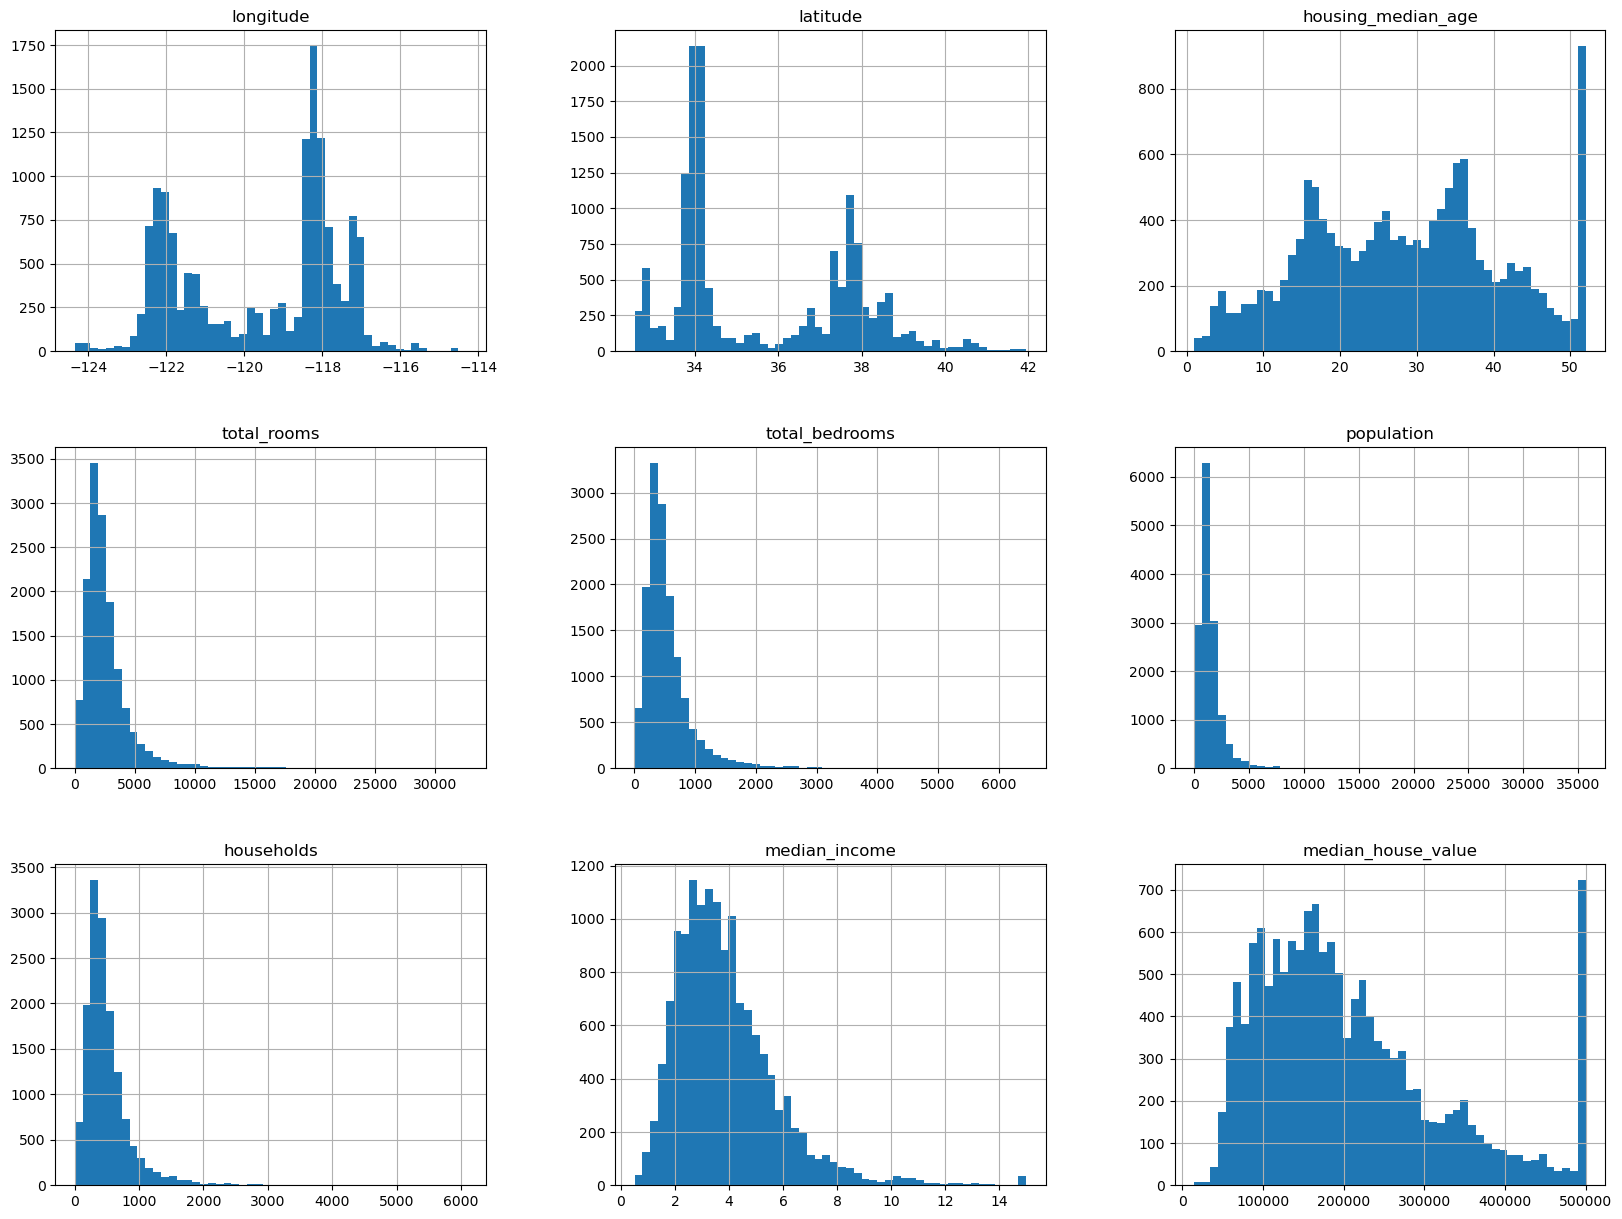

In [5]:
import pandas as pd
import matplotlib.pyplot as plt


# Plot histogram
data.hist(bins=50, figsize=(20,15))
plt.show()

**Insight.**

- Based on the graph above, it can be said that most of the columns in this dataset are not normally distributed and right-skewed.
- If only from the graph above, the housing_median_age and median_house_value columns have outlier values. However, we must explore about outliers further.

**Correlation of each column.**

C:\Users\HP 14\AppData\Local\Temp\ipykernel_9044\2254624402.py:6: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = data.corr(method='pearson')


Text(0.5, 1.0, 'Correlation Matrix')

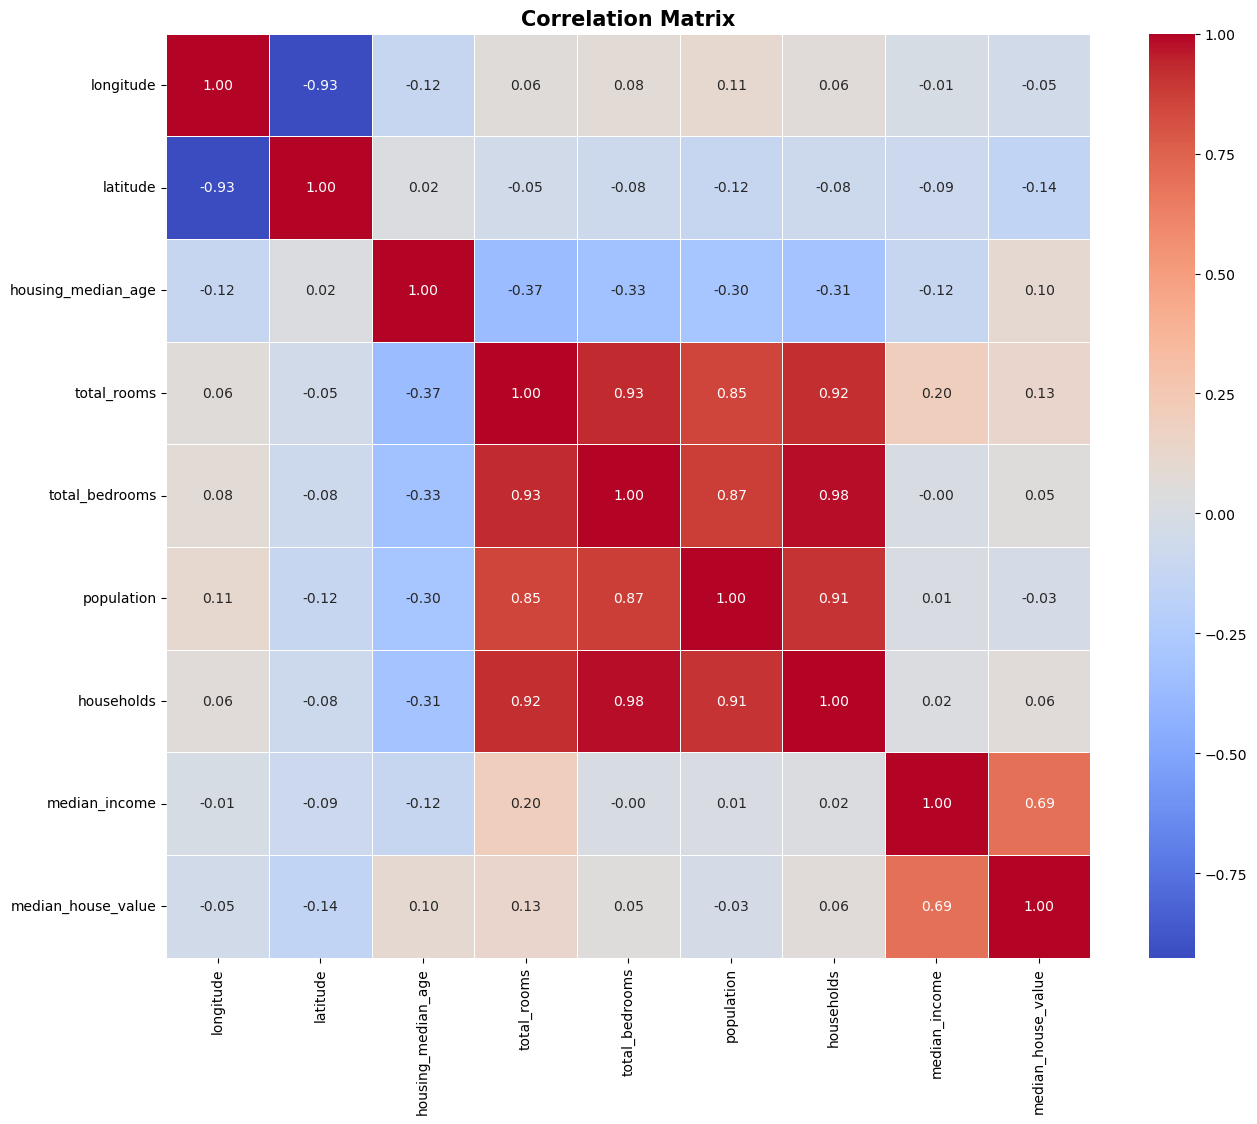

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 12))
corr = data.corr(method='pearson')
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
plt.title('Correlation Matrix', size=15, weight='bold')

Median_house_value is highly correlated with median_income. This indicates that house prices can depend on the average income of the population, so the higher the income, the higher the house price.

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

**House location based on coordinates.**

Text(0, 0.5, 'latitude')

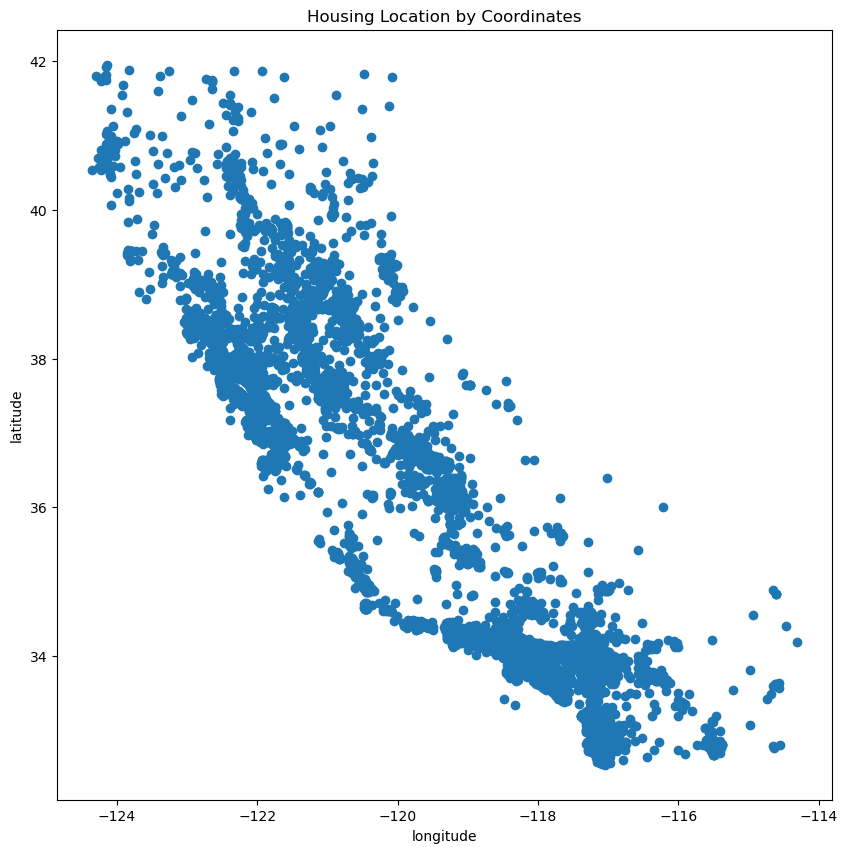

In [7]:
plt.figure(figsize=(10,10))
plt.scatter(data['longitude'], data['latitude'])
plt.title('Housing Location by Coordinates')
plt.xlabel('longitude')
plt.ylabel('latitude')

This graph displays the distribution of house locations based on longitude and latitude. There are some areas that are denser.

**House location by ocean proximity.**

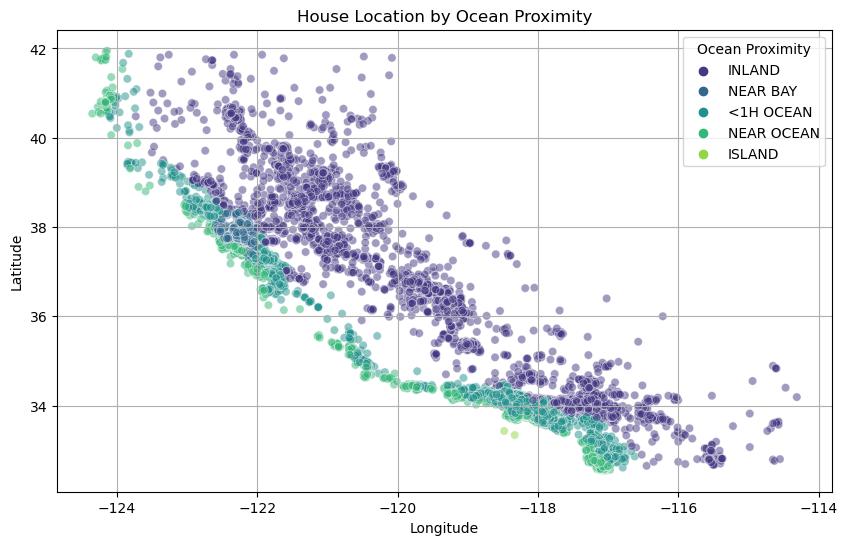

In [6]:
# Pilih variabel yang akan digunakan
latitude = data['latitude']
longitude = data['longitude']
ocean_proximity = data['ocean_proximity']

# Buat scatterplot persebaran lokasi rumah berdasarkan laut
plt.figure(figsize=(10, 6))

# Gunakan seaborn untuk memberikan hue pada scatter plot
sns.scatterplot(x=longitude, y=latitude, hue=ocean_proximity, palette='viridis', alpha=0.5)

plt.title('House Location by Ocean Proximity')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.legend(title='Ocean Proximity', loc='upper right')

plt.show()

In [9]:
# Menghitung jumlah rumah di setiap kategori ocean proximity
count_by_ocean_proximity = data['ocean_proximity'].value_counts()

# Menampilkan hasil
print(count_by_ocean_proximity)

<1H OCEAN     6369
INLAND        4576
NEAR OCEAN    1879
NEAR BAY      1622
ISLAND           2
Name: ocean_proximity, dtype: int64


**Insight.**

The region with the most housing is located in <1H ocean, while the least is on the island.

**Median Income by Location.**

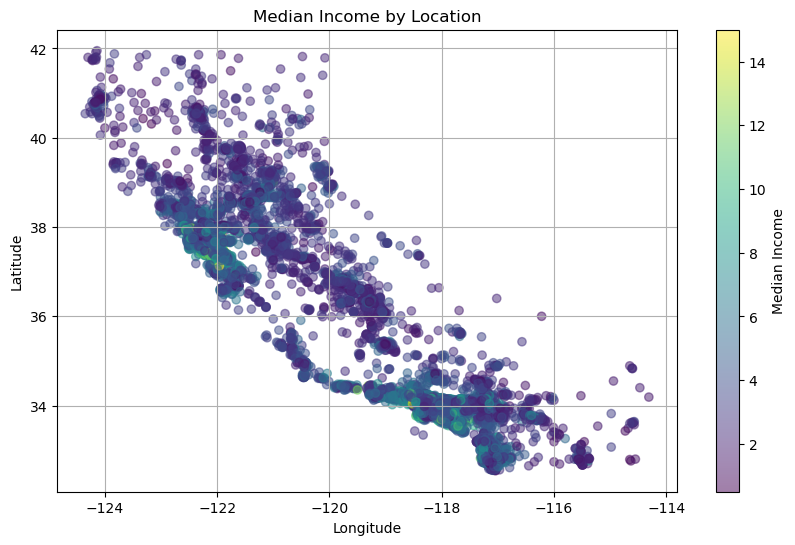

In [10]:
latitude = data['latitude']
longitude = data['longitude']
median_income = data['median_income']

# Buat scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(longitude, latitude, c=median_income, cmap='viridis', alpha=0.5)
plt.colorbar(label='Median Income')
plt.title('Median Income by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

In [11]:
# Menghitung rata-rata pendapatan penduduk per kategori ocean proximity
income_by_proximity = data.groupby('ocean_proximity')['median_income'].mean()

# Menampilkan hasil
print(income_by_proximity)

ocean_proximity
<1H OCEAN     4.224854
INLAND        3.197080
ISLAND        2.718750
NEAR BAY      4.179790
NEAR OCEAN    4.014166
Name: median_income, dtype: float64


**Insight.**

Not everyone who lives near the ocean has a high median income, but the closer to the ocean the higher the average income.

**Median House Value by Location.**

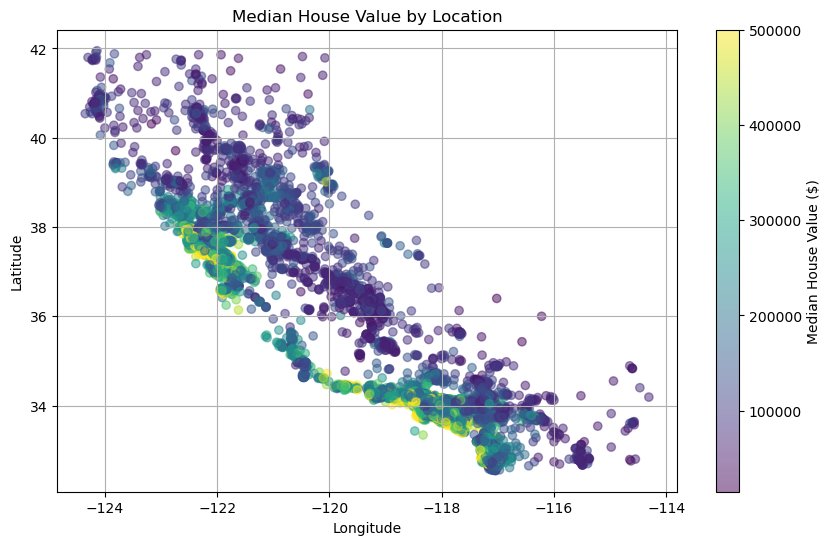

In [7]:
# Pilih variabel yang akan digunakan
latitude = data['latitude']
longitude = data['longitude']
median_house_value = data['median_house_value']

# Buat scatterplot
plt.figure(figsize=(10, 6))
scatter = plt.scatter(longitude, latitude, c=median_house_value, cmap='viridis', alpha=0.5)
plt.colorbar(label='Median House Value ($)')
plt.title('Median House Value by Location')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()

**Median House Value by Ocean Proximity.**

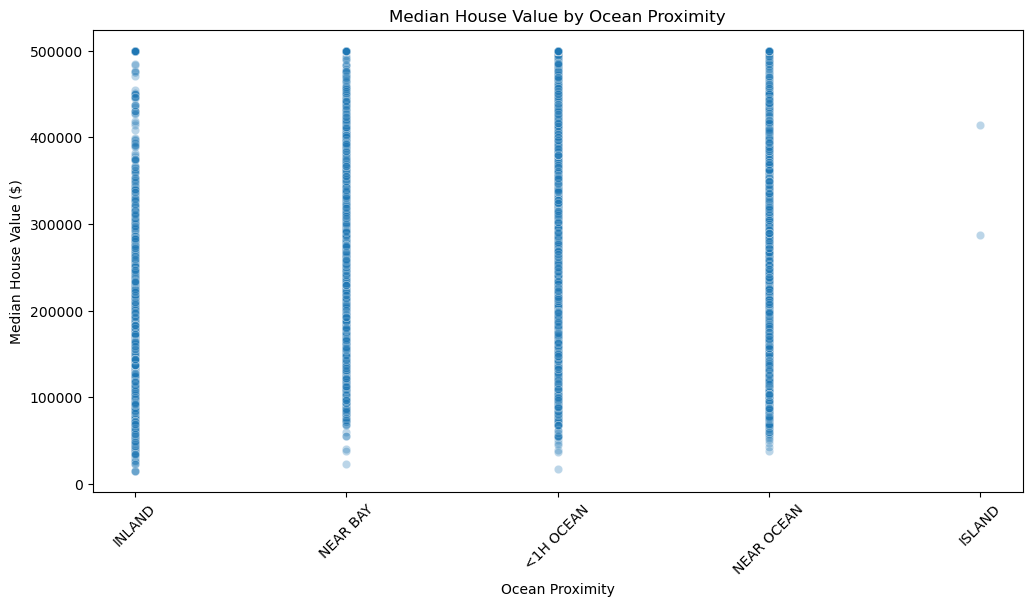

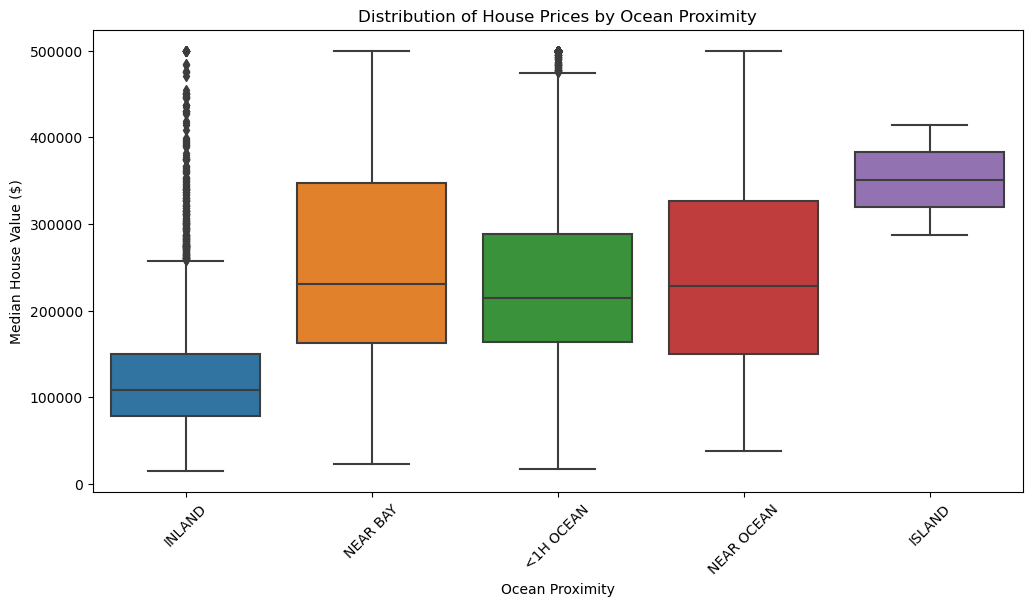

In [8]:
# Scatter plot untuk melihat hubungan
plt.figure(figsize=(12, 6))
sns.scatterplot(x='ocean_proximity', y='median_house_value', data=data, alpha=0.3)
plt.title('Median House Value by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value ($)')
plt.xticks(rotation=45)
plt.show()

# Box plot untuk melihat distribusi
plt.figure(figsize=(12, 6))
sns.boxplot(x='ocean_proximity', y='median_house_value', data=data)
plt.title('Distribution of House Prices by Ocean Proximity')
plt.xlabel('Ocean Proximity')
plt.ylabel('Median House Value ($)')
plt.xticks(rotation=45)
plt.show()

**Insight.**

- Differences in House Price Trends: The scatter plot shows that there are different trends in house prices across the different ocean proximity categories. Houses that are close to the ocean (the categories are "NEAR OCEAN" and "NEAR BAY") tend to have higher prices compared to those that are inland ("INLAND").

- House Price Distribution: The box plot illustrates the distribution of house prices in each ocean proximity category. The "NEAR OCEAN" and "NEAR BAY" categories have higher medians and greater price variability compared to the other categories.

- Specific Patterns: The scatter plot shows that there are specific patterns for each ocean proximity category. For example, in the "INLAND" category, house prices tend to be more diverse and there are some points with relatively low prices.

**Median House Value by Facilities.**

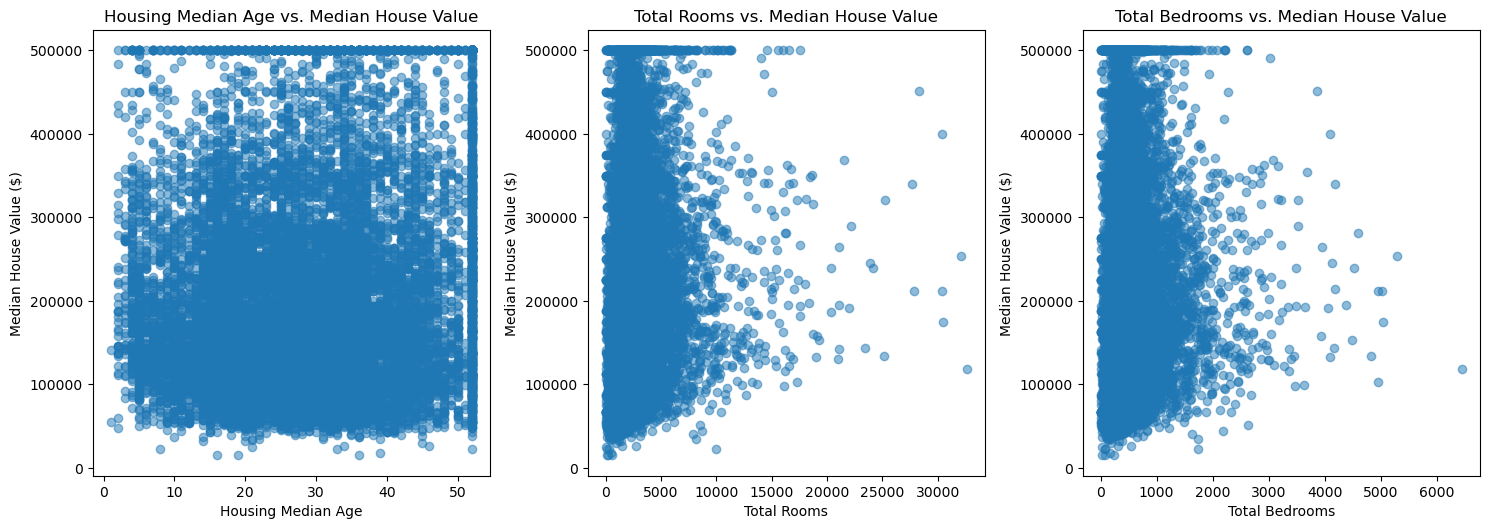

In [14]:
# Pilih variabel yang akan digunakan
housing_median_age = data['housing_median_age']
total_rooms = data['total_rooms']
total_bedrooms = data['total_bedrooms']
population = data['population']
households = data['households']
median_house_value = data['median_house_value']

# Buat grafik hubungan antara fasilitas rumah dan harga rumah
plt.figure(figsize=(15, 10))

# Housing Median Age vs. Median House Value
plt.subplot(2, 3, 1)
plt.scatter(housing_median_age, median_house_value, alpha=0.5)
plt.title('Housing Median Age vs. Median House Value')
plt.xlabel('Housing Median Age')
plt.ylabel('Median House Value ($)')

# Total Rooms vs. Median House Value
plt.subplot(2, 3, 2)
plt.scatter(total_rooms, median_house_value, alpha=0.5)
plt.title('Total Rooms vs. Median House Value')
plt.xlabel('Total Rooms')
plt.ylabel('Median House Value ($)')

# Total Bedrooms vs. Median House Value
plt.subplot(2, 3, 3)
plt.scatter(total_bedrooms, median_house_value, alpha=0.5)
plt.title('Total Bedrooms vs. Median House Value')
plt.xlabel('Total Bedrooms')
plt.ylabel('Median House Value ($)')

plt.tight_layout()
plt.show()

**Insight.**

- Housing Median Age vs. Median House Value: There is no clear pattern showing the relationship between housing median age and median house value. The data seems to be randomly distributed.

- Total Rooms vs. Median House Value: There is a weak positive trend; as the total number of rooms increases, the median house value also increase.

- Total Bedrooms vs. Median House Value: As with total rooms, there is a positive trend; however, the increase in median house value does not appear to be as strong as the increase in total rooms.

**Median House Value by Population and Households.**

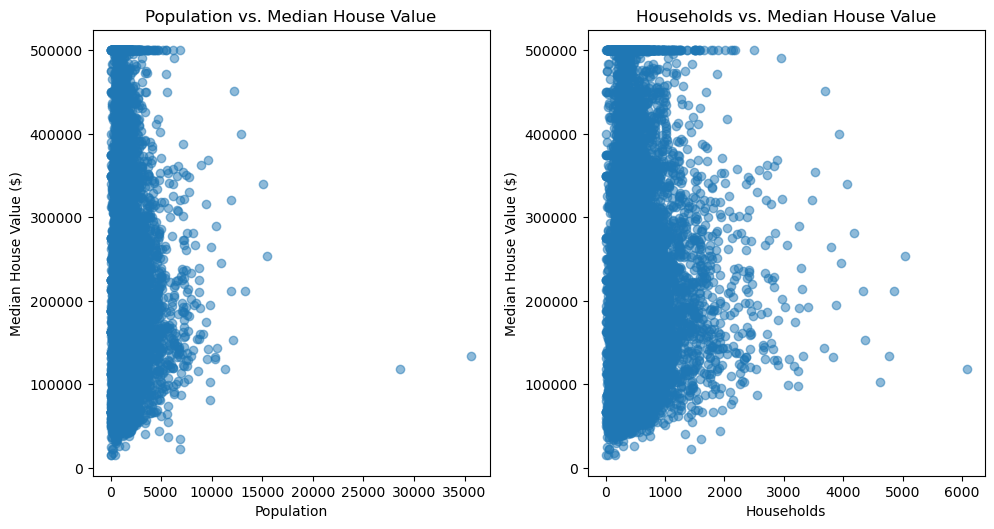

In [15]:
plt.figure(figsize=(15, 10))

# Population vs. Median House Value
plt.subplot(2, 3, 4)
plt.scatter(population, median_house_value, alpha=0.5)
plt.title('Population vs. Median House Value')
plt.xlabel('Population')
plt.ylabel('Median House Value ($)')

# Households vs. Median House Value
plt.subplot(2, 3, 5)
plt.scatter(households, median_house_value, alpha=0.5)
plt.title('Households vs. Median House Value')
plt.xlabel('Households')
plt.ylabel('Median House Value ($)')

plt.tight_layout()
plt.show()

**Insight.**

- Population vs. Median House Value: There is no clear relationship between population and median house value. This scatter plot shows that there are some areas with small populations that have high house values, as well as areas with larger populations but lower house values.

- Households vs. Median House Value: As with population, no strong relationship can be seen from this visualization. However, there are a number of smaller households with higher median house values.

**Median House Value by Median Income.**

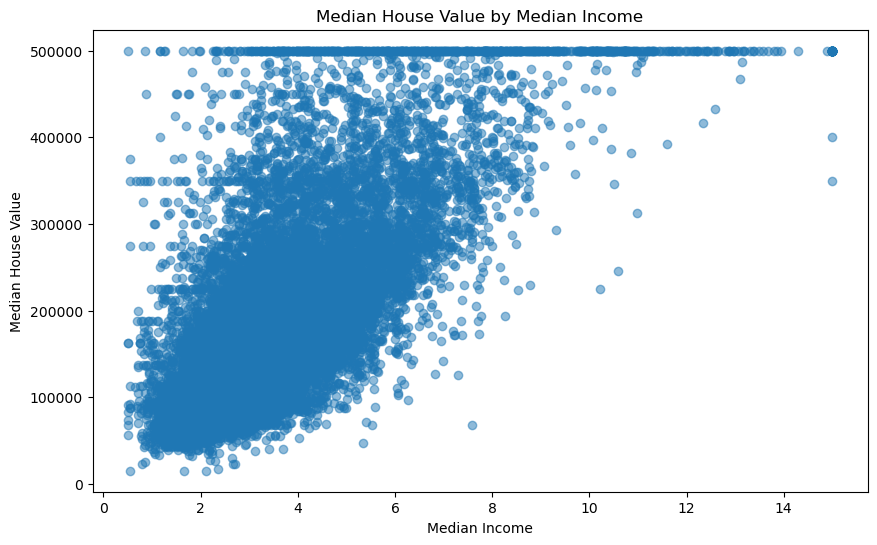

In [16]:
# Tentukan kolom target dan kolom fitur
target_column = 'median_house_value'
feature_column = 'median_income'

# Buat scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(data[feature_column], data[target_column], alpha=0.5)
plt.title('Median House Value by Median Income')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# Data Preparation.

**Duplicate.**

In [19]:
data.duplicated().sum()

0

**Insight.**

There are no duplicate values in the data.

**Missing Value.**

In [20]:
data.isna().sum()

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        137
population              0
households              0
median_income           0
ocean_proximity         0
median_house_value      0
dtype: int64

**Handling Missing Value.**

In [21]:
data['total_bedrooms'].fillna(data['total_bedrooms'].median(), inplace=True)
print(data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64


**Insight.**

The total_bedrooms column has a missing value of 137. to solve this, we will fill it using the median value, the reason is because the total_bedrooms column is not normally distributed.

**Outlier.**

There are 4687 outliers detected in this dataset. There are several ways to handle them, but due to the large number, we will only focus on the extreme values so as not to cause bias.

**Handling Outlier.**



In [22]:
data[data['housing_median_age']>40]['housing_median_age'].value_counts().head()

housing_median_age
52.0    896
42.0    270
44.0    256
43.0    244
41.0    221
Name: count, dtype: int64

In [23]:
filtered_data = data.drop(data[data['housing_median_age']==52].index)
filtered_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


In [24]:
filtered_data[filtered_data['median_house_value']>450000]['median_house_value'].value_counts().head()

median_house_value
500001.0    552
500000.0     10
475000.0      5
483300.0      5
450400.0      3
Name: count, dtype: int64

In [25]:
filtered_data = filtered_data.drop(filtered_data[filtered_data['median_house_value']==500001.0].index)  
filtered_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0
...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0
14445,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0


**Rare Value.**

In [26]:
filtered_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     5818
INLAND        4442
NEAR OCEAN    1639
NEAR BAY      1100
ISLAND           1
Name: count, dtype: int64

in the `ocean_proximity` column, there is an island category that only contain 1 value. this number is very small, so we will drop it.

In [27]:
# Menghapus data dengan 'ocean_proximity' == 'ISLAND'
filtered_data = filtered_data[filtered_data['ocean_proximity'] != 'ISLAND']
filtered_data['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     5818
INLAND        4442
NEAR OCEAN    1639
NEAR BAY      1100
Name: count, dtype: int64

# Feature Engineering.

**Feature creation.**

Because facilities affect the price of the house (medium_house_value), so the number of rooms and bedrooms per household is added.

In [30]:
# Tambahkan kolom baru untuk total ruangan per rumah tangga
filtered_data['total_rooms_per_household'] = round(filtered_data['total_rooms'] / filtered_data['households'])

# Tambahkan kolom baru untuk total kamar tidur per rumah tangga
filtered_data['total_bedrooms_per_household'] = round(filtered_data['total_bedrooms'] / filtered_data['households'])

filtered_data

C:\Users\HP 14\AppData\Local\Temp\ipykernel_452\3872639335.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['total_rooms_per_household'] = round(filtered_data['total_rooms'] / filtered_data['households'])
C:\Users\HP 14\AppData\Local\Temp\ipykernel_452\3872639335.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_data['total_bedrooms_per_household'] = round(filtered_data['total_bedrooms'] / filtered_data['households'])


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value,total_rooms_per_household,total_bedrooms_per_household
1,-122.21,37.77,43.0,1017.0,328.0,836.0,277.0,2.2604,NEAR BAY,100000.0,4.0,1.0
2,-118.04,33.87,17.0,2358.0,396.0,1387.0,364.0,6.2990,<1H OCEAN,285800.0,6.0,1.0
3,-118.28,34.06,17.0,2518.0,1196.0,3051.0,1000.0,1.7199,<1H OCEAN,175000.0,3.0,1.0
4,-119.81,36.73,50.0,772.0,194.0,606.0,167.0,2.2206,INLAND,59200.0,5.0,1.0
5,-117.79,33.80,11.0,10535.0,1620.0,4409.0,1622.0,6.6700,<1H OCEAN,283200.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
14443,-121.26,38.27,20.0,1314.0,229.0,712.0,219.0,4.4125,INLAND,144600.0,6.0,1.0
14444,-120.89,37.48,27.0,1118.0,195.0,647.0,209.0,2.9135,INLAND,159400.0,5.0,1.0
14445,-121.90,36.58,31.0,1431.0,435.0,704.0,393.0,3.1977,NEAR OCEAN,289300.0,4.0,1.0
14446,-117.93,33.62,34.0,2125.0,498.0,1052.0,468.0,5.6315,<1H OCEAN,484600.0,5.0,1.0


In [27]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [28]:
# test split
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# preprocessing
import category_encoders as ce
from sklearn.preprocessing import StandardScaler, RobustScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Cross Validation
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.svm import SVR

from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error

**Encoding.**

In [29]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
filtered_data['ocean_proximity'] = le.fit_transform(filtered_data['ocean_proximity'])

In [30]:
transformer = ColumnTransformer([
    ('One Hot', OneHotEncoder(handle_unknown='ignore'), ['ocean_proximity'])
], remainder='passthrough')

**Insight.**

This process aims to convert categorical columns to numerical. The only column that is categorical is the `ocean_proximity` column.

0 : <1H Ocean.

1 : Inland.

2 : Near Bay.

3 : Near Ocean.

**Split the data.**

Divide the data into training data and test data. the division is 70:30.

In [31]:
X = filtered_data.drop('median_house_value', axis=1)
y = filtered_data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [32]:
X_train

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,total_rooms_per_household,total_bedrooms_per_household
13328,-122.29,37.76,18.0,2873.0,763.0,1243.0,663.0,5.1702,2,4.0,1.0
12663,-118.30,34.00,40.0,1131.0,281.0,859.0,230.0,1.1806,0,5.0,1.0
3757,-118.27,33.94,30.0,1764.0,397.0,1406.0,362.0,1.4490,0,5.0,1.0
6813,-118.43,34.15,28.0,6270.0,1706.0,2549.0,1497.0,3.2241,0,4.0,1.0
10051,-115.37,32.81,23.0,1458.0,294.0,866.0,275.0,2.3594,1,5.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
12179,-118.21,34.21,41.0,1676.0,263.0,757.0,255.0,4.7734,0,7.0,1.0
983,-121.29,37.96,50.0,1669.0,558.0,1340.0,484.0,1.3191,1,3.0,1.0
5756,-117.05,32.75,29.0,2767.0,612.0,1437.0,587.0,2.8306,3,5.0,1.0
13528,-122.34,37.97,19.0,392.0,109.0,287.0,81.0,6.0426,2,5.0,1.0


# Model Experiment.

In [33]:
linreg = LinearRegression()
knn = KNeighborsRegressor()
tree = DecisionTreeRegressor(random_state=1)
rf = RandomForestRegressor(random_state=1)
xgb = XGBRegressor(random_state=1)
svr = SVR()

scaler = RobustScaler()

models = [linreg, knn , tree, rf, xgb, svr]

score_rmse = []
nilai_mean_rmse = []
nilai_std_rmse = []

score_mae = []
nilai_mean_mae = []
nilai_std_mae = []

score_mape = []
nilai_mean_mape = []
nilai_std_mape = []

# Mencari algoritma terbaik
for i in models:
    
    crossval = KFold(n_splits=5, shuffle=True, random_state=1)

    estimator = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', i)
    ])

    # RMSE
    model_cv_rmse = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_root_mean_squared_error', 
        error_score='raise'
        )

    # print(model_cv_rmse, i)

    score_rmse.append(model_cv_rmse)
    nilai_mean_rmse.append(model_cv_rmse.mean())
    nilai_std_rmse.append(model_cv_rmse.std())

    # MAE
    model_cv_mae = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_error', 
        error_score='raise'
        )

    # print(model_cv_mae, i)

    score_mae.append(model_cv_mae)
    nilai_mean_mae.append(model_cv_mae.mean())
    nilai_std_mae.append(model_cv_mae.std())

    # MAPE
    model_cv_mape = cross_val_score(
        estimator, 
        X_train, 
        y_train, 
        cv=crossval, 
        scoring='neg_mean_absolute_percentage_error', 
        error_score='raise'
        )

    # print(model_cv_mape, i)

    score_mape.append(model_cv_mape)
    nilai_mean_mape.append(model_cv_mape.mean())
    nilai_std_mape.append(model_cv_mape.std())

In [34]:
pd.DataFrame({
    'Model': ['Linear Regression', 'KNN Regressor', 'DecisionTree Regressor', 'RandomForest Regressor', 'XGBoost Regressor', 'SVR'],
    'Score_RMSE': score_rmse,
    'Mean_RMSE': nilai_mean_rmse,
    'Std_RMSE': nilai_std_rmse,
    'Score_MAE': score_mae,
    'Mean_MAE': nilai_mean_mae,
    'Std_MAE': nilai_std_mae,
    'Score_MAPE': score_mape,
    'Mean_MAPE': nilai_mean_mape,
    'Std_MAPE': nilai_std_mape
})

,Model,Score_RMSE,Mean_RMSE,Std_RMSE,Score_MAE,Mean_MAE,Std_MAE,Score_MAPE,Mean_MAPE,Std_MAPE
0,Linear Regression,"[-58490.654635788414, -57360.80753029435, -592...",-59340.439962,2290.759407,"[-43072.67692307692, -42334.36483516484, -4311...",-43426.035040,1294.508184,"[-0.25961064089630875, -0.2613014779058797, -0...",-0.267556,0.007283
1,KNN Regressor,"[-57014.45691652018, -55772.02507370519, -5613...",-57127.168226,1696.898151,"[-40696.21967032967, -39266.90098901099, -3978...",-40325.080340,1013.719571,"[-0.23639488578638373, -0.23277524701098712, -...",-0.237123,0.005658
2,DecisionTree Regressor,"[-65231.934680781946, -62665.65470989496, -617...",-64822.528484,3994.926907,"[-43805.10989010989, -42615.43956043956, -4139...",-43359.397814,2151.117659,"[-0.24400167225430383, -0.2484950482195667, -0...",-0.250975,0.016465
3,RandomForest Regressor,"[-46398.055741081385, -45087.094083815646, -47...",-47096.766889,2178.601455,"[-31795.770791208794, -31196.744456043954, -32...",-32007.878236,953.333191,"[-0.18605029253881775, -0.1882149213690583, -0...",-0.191042,0.008301
4,XGBoost Regressor,"[-45402.90623077792, -43429.65083021238, -4621...",-45647.600428,2155.380162,"[-31014.441173377403, -30091.89491436298, -310...",-30847.785667,775.023146,"[-0.17887275366443603, -0.18058898862039516, -...",-0.183338,0.004329
5,SVR,"[-97868.54935366417, -94370.65203678996, -9568...",-97055.077488,2145.747966,"[-75623.17351667947, -72093.51558569194, -7420...",-74517.990537,1486.205219,"[-0.4947310171191905, -0.476267574524406, -0.4...",-0.492436,0.008244


**Insight.**

of the 6 models tested, the model that has the best or smallest RMSE and MAE values is XGBRegressor, followed by Random Forest Regressor and KNN Regresor. these two models will be tested again before tuning.

**Prediction using test set.**

In [35]:
models = {
    'XGB': XGBRegressor(random_state=1),
    'RandomForest': RandomForestRegressor(random_state=1),
    'KNN Regresor': KNeighborsRegressor()
}

score_rmse = []
score_mae = []
score_mape = []

for i in models:

    model = Pipeline([
        ('preprocessing', transformer),
        ('scaler', scaler),
        ('model', models[i])
        ])

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score_rmse.append(np.sqrt(mean_squared_error(y_test, y_pred)))
    score_mae.append(mean_absolute_error(y_test, y_pred))
    score_mape.append(mean_absolute_percentage_error(y_test, y_pred))

score_before_tuning = pd.DataFrame({'RMSE': score_rmse, 'MAE': score_mae, 'MAPE': score_mape}, index=models.keys())
score_before_tuning

,RMSE,MAE,MAPE
XGB,42960.873008,29305.698190,0.170712
RandomForest,44822.487975,30545.579997,0.178567
KNN Regresor,55345.676479,38874.190000,0.222722


Based on the prediction results on the test set, xgb has a lower score than the other two, indicating that XGBoost performs better. but we will see how these three models score after the tuning process.

**Hyperparameter Tuning.**

- **XGBoost.** 

In [36]:
# Kedalaman pohon
max_depth = list(np.arange(1, 11))

# Learning rate
learning_rate = list(np.arange(1, 100)/100)

# Jumlah pohon
n_estimators = list(np.arange(100, 201))

# Jumlah baris tiap pohon (% dari total baris train set)
subsample = list(np.arange(2, 10)/10)

# Gamma (min_impurity_decrease)
gamma = list(np.arange(1, 11)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Jumlah feature yang digunakan untuk tiap pohon (% dari total kolom train set)
colsample_bytree = list(np.arange(1, 10)/10)

# Alpha (regularization)
reg_alpha = list(np.logspace(-3, 1, 10)) # Semakin besar nilainya, semakin konservatif/simpel modelnya

# Hyperparam space XGboost
hyperparam_space_xgb = {
    'model__max_depth': max_depth, 
    'model__learning_rate': learning_rate,
    'model__n_estimators': n_estimators,
    'model__subsample': subsample,
    'model__gamma': gamma,
    'model__colsample_bytree': colsample_bytree,
    'model__reg_alpha': reg_alpha
}

In [37]:
# Benchmark model dengan hyperparameter tuning
xgb = XGBRegressor(random_state=1, verbosity=0)

# Membuat algorithm chains
estimator_xgb = Pipeline([
        ('preprocessing', transformer),
        ('model', xgb)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_xgb = RandomizedSearchCV(
    estimator_xgb, 
    param_distributions = hyperparam_space_xgb,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1  
)

In [38]:
# Fitting data training untuk mencari parameter terbaik
random_xgb.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['ocean_proximity'])])),
                                             ('model',
                                              XGBRegressor(base_score=None,
                                                           booster=None,
                                                           callbacks=None,
                                                           colsample_bylevel=None,
                                                           colsample_bynode=No...
                                                             0.007742636826811269,
                                                             0.021544346900318832,
                                                             0.05994842503189409,
                                                             0.1668100537200059,
                                                             0.46415888336127775,
                                                             1.2915496650148828,
                                                             3.593813663804626,
                                                             10.0],
                                        'model__subsample': [0.2, 0.3, 0.4, 0.5,
                                                             0.6, 0.7, 0.8,
                                                             0.9]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [39]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_xgb.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__subsample,param_model__reg_alpha,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__gamma,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
7,1.690577,0.024736,0.024934,0.001670,0.9,0.059948,119,8,0.05,5,...,817.210691,1,-0.175046,-0.175315,-0.174418,-0.175776,-0.190102,-0.178131,0.006001,1
20,0.456578,0.015339,0.015758,0.002632,0.9,0.007743,143,4,0.38,6,...,852.068735,2,-0.181189,-0.190081,-0.189322,-0.192016,-0.198196,-0.190161,0.005463,2
17,0.749994,0.005677,0.019348,0.001353,0.6,0.001,190,5,0.04,9,...,858.052244,3,-0.187323,-0.189951,-0.186452,-0.193194,-0.204526,-0.192289,0.006554,3
8,0.855711,0.020242,0.022140,0.001716,0.7,0.021544,182,6,0.31,2,...,899.189252,4,-0.189607,-0.191141,-0.193363,-0.193909,-0.209945,-0.195593,0.007341,4
3,1.460094,0.050339,0.041090,0.004343,0.5,0.021544,166,8,0.1,9,...,576.736330,5,-0.194648,-0.197142,-0.198442,-0.198921,-0.204643,-0.198759,0.003294,6


In [40]:
# Cek skor dan params terbaik
print('XGBoost')
print('Best_score:', random_xgb.best_score_)
print('Best_params:', random_xgb.best_params_)

XGBoost
Best_score: -44419.50436764458
Best_params: {'model__subsample': 0.9, 'model__reg_alpha': 0.05994842503189409, 'model__n_estimators': 119, 'model__max_depth': 8, 'model__learning_rate': 0.05, 'model__gamma': 5, 'model__colsample_bytree': 0.8}


- **Random Forest.**

In [41]:
n_estimators = list(np.arange(100, 201))
max_features = list(np.arange(2, 11))
max_depth = list(np.arange(1, 11))
min_samples_split = list(np.arange(2, 21))
min_samples_leaf = list(np.arange(1, 21))


hyperparam_space_rf = {
    'model__n_estimators': n_estimators,
    'model__max_features': max_features,
    'model__max_depth': max_depth,
    'model__min_samples_split': min_samples_split,
    'model__min_samples_leaf': min_samples_leaf,
}

In [42]:
rf = RandomForestRegressor(random_state=0)

# Membuat algorithm chains
estimator_rf = Pipeline([
    ('preprocessing', transformer),
    ('scaler', scaler),
    ('model', rf)
])

crossval = KFold(n_splits=5, shuffle=True, random_state=0)

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator_rf,
    param_distributions = hyperparam_space_rf,
    n_iter = 100,
    cv = crossval,
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # hanya bisa memilih satu metrik untuk optimisasi
    random_state = 1
)

In [43]:
# Fitting data training untuk mencari parameter terbaik
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=0, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['ocean_proximity'])])),
                                             ('scaler', RobustScaler()),
                                             ('model',
                                              RandomForestRegressor(random_state=0))]),
                   n_iter=100, n_jobs=-1,
                   param_distr...
                                        'model__min_samples_split': [2, 3, 4, 5,
                                                                     6, 7, 8, 9,
                                                                     10, 11, 12,
                                                                     13, 14, 15,
                                                                     16, 17, 18,
                                                                     19, 20],
                                        'model__n_estimators': [100, 101, 102,
                                                                103, 104, 105,
                                                                106, 107, 108,
                                                                109, 110, 111,
                                                                112, 113, 114,
                                                                115, 116, 117,
                                                                118, 119, 120,
                                                                121, 122, 123,
                                                                124, 125, 126,
                                                                127, 128, 129, ...]},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [44]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_rf.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,params,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
41,6.022322,0.160897,0.061840,0.026615,102,10,7,6,10,"{'model__n_estimators': 102, 'model__min_sampl...",...,527.747716,1,-0.208849,-0.218048,-0.213431,-0.204065,-0.202816,-0.209442,0.005712,2
18,8.213799,0.476674,0.072805,0.014397,120,6,12,7,10,"{'model__n_estimators': 120, 'model__min_sampl...",...,534.846461,3,-0.210531,-0.219122,-0.214767,-0.204930,-0.204778,-0.210826,0.005582,3
13,14.460175,0.705348,0.078989,0.011791,150,4,13,10,10,"{'model__n_estimators': 150, 'model__min_sampl...",...,571.651928,2,-0.207950,-0.217327,-0.213835,-0.203639,-0.201866,-0.208924,0.005889,1
50,14.873220,0.328774,0.107319,0.022105,180,13,6,7,9,"{'model__n_estimators': 180, 'model__min_sampl...",...,534.723279,5,-0.211382,-0.222012,-0.217810,-0.208294,-0.205748,-0.213049,0.006028,5
87,12.557718,0.238621,0.086677,0.007356,185,14,6,7,9,"{'model__n_estimators': 185, 'model__min_sampl...",...,478.315809,6,-0.211552,-0.221921,-0.218140,-0.207909,-0.207101,-0.213325,0.005801,6


In [45]:
# Cek skor dan params terbaik
print('RandomForest')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

RandomForest
Best_score: -50067.92149942316
Best_params: {'model__n_estimators': 102, 'model__min_samples_split': 10, 'model__min_samples_leaf': 7, 'model__max_features': 6, 'model__max_depth': 10}


- **KNN.**

In [46]:
n_neighbors = list(np.arange(8, 21))
weights = ['uniform', 'distance']
leaf_size = list(np.arange(20, 41))
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']

# Hyperparam space KNN
hyperparam_space_knn = {
    'model__n_neighbors': n_neighbors, 
    'model__weights': weights,
    'model__leaf_size': leaf_size,
    'model__algorithm': algorithm
}

In [47]:
model = KNeighborsRegressor()

# Membuat algorithm chains
estimator_knn = Pipeline([
        ('preprocessing', transformer),
        ('model', model)
        ])

crossval = KFold(n_splits=5, shuffle=True, random_state=1)

# Hyperparameter tuning
random_knn = RandomizedSearchCV(
    estimator_knn, 
    param_distributions = hyperparam_space_knn,
    n_iter = 50,
    cv = crossval, 
    scoring = ['neg_root_mean_squared_error', 'neg_mean_absolute_error', 'neg_mean_absolute_percentage_error'], 
    n_jobs = -1,
    refit = 'neg_root_mean_squared_error', # Hanya bisa memilih salah stau metric untuk optimisasi
    random_state = 1
)

In [48]:
# Fitting data training untuk mencari parameter terbaik
random_knn.fit(X_train, y_train)

RandomizedSearchCV(cv=KFold(n_splits=5, random_state=1, shuffle=True),
                   estimator=Pipeline(steps=[('preprocessing',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('One '
                                                                               'Hot',
                                                                               OneHotEncoder(handle_unknown='ignore'),
                                                                               ['ocean_proximity'])])),
                                             ('model', KNeighborsRegressor())]),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'model__algorithm': ['auto',
                                                             'ball_...
                                                             'kd_tree',
                                                             'brute'],
                                        'model__leaf_size': [20, 21, 22, 23, 24,
                                                             25, 26, 27, 28, 29,
                                                             30, 31, 32, 33, 34,
                                                             35, 36, 37, 38, 39,
                                                             40],
                                        'model__n_neighbors': [8, 9, 10, 11, 12,
                                                               13, 14, 15, 16,
                                                               17, 18, 19, 20],
                                        'model__weights': ['uniform',
                                                           'distance']},
                   random_state=1, refit='neg_root_mean_squared_error',
                   scoring=['neg_root_mean_squared_error',
                            'neg_mean_absolute_error',
                            'neg_mean_absolute_percentage_error'])

In [49]:
# Melihat hasil tuning dalam bentuk dataframe. Diurutkan berdasarkan RMSE, MAE & MAPE
pd.DataFrame(random_knn.cv_results_).sort_values(by=['rank_test_neg_root_mean_squared_error', 'rank_test_neg_mean_absolute_error', 'rank_test_neg_mean_absolute_percentage_error']).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__weights,param_model__n_neighbors,param_model__leaf_size,param_model__algorithm,params,split0_test_neg_root_mean_squared_error,...,std_test_neg_mean_absolute_error,rank_test_neg_mean_absolute_error,split0_test_neg_mean_absolute_percentage_error,split1_test_neg_mean_absolute_percentage_error,split2_test_neg_mean_absolute_percentage_error,split3_test_neg_mean_absolute_percentage_error,split4_test_neg_mean_absolute_percentage_error,mean_test_neg_mean_absolute_percentage_error,std_test_neg_mean_absolute_percentage_error,rank_test_neg_mean_absolute_percentage_error
13,0.060837,0.001410,0.060837,0.001670,distance,20,25,kd_tree,"{'model__weights': 'distance', 'model__n_neigh...",-86706.813541,...,1213.474153,1,-0.480412,-0.475100,-0.476512,-0.493157,-0.480710,-0.481178,0.006372,1
5,0.054653,0.016442,0.305784,0.100085,distance,19,30,ball_tree,"{'model__weights': 'distance', 'model__n_neigh...",-86737.711445,...,1203.617170,2,-0.481172,-0.475189,-0.476908,-0.493323,-0.480428,-0.481404,0.006355,2
46,0.009806,0.008046,0.235758,0.019068,distance,18,21,brute,"{'model__weights': 'distance', 'model__n_neigh...",-86878.122788,...,1189.030310,3,-0.481441,-0.475545,-0.477863,-0.493267,-0.480803,-0.481784,0.006119,3
33,0.037378,0.005823,0.224565,0.009304,distance,17,30,ball_tree,"{'model__weights': 'distance', 'model__n_neigh...",-86922.867562,...,1172.182701,4,-0.480851,-0.475696,-0.478742,-0.493171,-0.480787,-0.481849,0.005964,4
35,0.047577,0.002256,0.254942,0.009996,distance,17,39,ball_tree,"{'model__weights': 'distance', 'model__n_neigh...",-86922.867562,...,1172.182701,4,-0.480851,-0.475696,-0.478742,-0.493171,-0.480787,-0.481849,0.005964,4


In [50]:
# Cek skor dan params terbaik
print('KNN')
print('Best_score:', random_knn.best_score_)
print('Best_params:', random_knn.best_params_)

KNN
Best_score: -85324.2364211283
Best_params: {'model__weights': 'distance', 'model__n_neighbors': 20, 'model__leaf_size': 25, 'model__algorithm': 'kd_tree'}


**Predict with set test after tuning.**

After tuning, it is now necessary to predict again using the tuned model. after that we will be able to see the comparison from before and after tuning.

- **XGBoost.**

In [51]:
model = {'XGB': XGBRegressor(random_state=1)}

# Define model terhadap estimator terbaik
xgb_tuning = random_xgb.best_estimator_

# Fitting model
xgb_tuning.fit(X_train, y_train)

# Predict test set
y_pred_xgb_tuning = xgb_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_xgb_tuning = np.sqrt(mean_squared_error(y_test, y_pred_xgb_tuning))
mae_xgb_tuning = mean_absolute_error(y_test, y_pred_xgb_tuning)
mape_xgb_tuning = mean_absolute_percentage_error(y_test, y_pred_xgb_tuning)

score_after_tuning_xgb = pd.DataFrame({'RMSE': rmse_xgb_tuning, 'MAE': mae_xgb_tuning, 'MAPE': mape_xgb_tuning}, index=model.keys())
score_after_tuning_xgb

,RMSE,MAE,MAPE
XGB,41840.641431,28418.648248,0.165592


- **Random Forest.**

In [52]:
model = {'RF': RandomForestRegressor(random_state=1)}

# Define model terhadap estimator terbaik
rf_tuning = random_rf.best_estimator_

# Fitting model
rf_tuning.fit(X_train, y_train)

# Predict test set
y_pred_rf_tuning = rf_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_rf_tuning = np.sqrt(mean_squared_error(y_test, y_pred_rf_tuning))
mae_rf_tuning = mean_absolute_error(y_test, y_pred_rf_tuning)
mape_rf_tuning = mean_absolute_percentage_error(y_test, y_pred_rf_tuning)

score_after_tuning_rf = pd.DataFrame({'RMSE': rmse_rf_tuning, 'MAE': mae_rf_tuning, 'MAPE': mape_rf_tuning}, index=model.keys())
score_after_tuning_rf

,RMSE,MAE,MAPE
RF,48314.415307,33663.271576,0.196115


- **KNN.**

In [53]:
model = {'KNN': KNeighborsRegressor()}

# Define model terhadap estimator terbaik
knn_tuning = random_knn.best_estimator_

# Fitting model
knn_tuning.fit(X_train, y_train)

# Predict test set
y_pred_knn_tuning = knn_tuning.predict(X_test)

# Simpan nilai metrics RMSE, MAE & MAPE setelah tuning
rmse_knn_tuning = np.sqrt(mean_squared_error(y_test, y_pred_knn_tuning))
mae_knn_tuning = mean_absolute_error(y_test, y_pred_knn_tuning)
mape_knn_tuning = mean_absolute_percentage_error(y_test, y_pred_knn_tuning)

score_after_tuning_knn = pd.DataFrame({'RMSE': rmse_knn_tuning, 'MAE': mae_knn_tuning, 'MAPE': mape_knn_tuning}, index=model.keys())
score_after_tuning_knn

,RMSE,MAE,MAPE
KNN,85243.472394,67624.959116,0.477147


**Comparation.**

lets compare the scores of this 3 model after tuning process.

- **Before Tuning.**

In [54]:
display(pd.DataFrame(score_before_tuning.loc['XGB']).T, pd.DataFrame(score_before_tuning.loc['RandomForest']).T, pd.DataFrame(score_before_tuning.loc['KNN Regresor']).T) 

,RMSE,MAE,MAPE
XGB,42960.873008,29305.69819,0.170712


,RMSE,MAE,MAPE
RandomForest,44822.487975,30545.579997,0.178567


,RMSE,MAE,MAPE
KNN Regresor,55345.676479,38874.19,0.222722


- **After Tuning.**

In [55]:
display(score_after_tuning_xgb, score_after_tuning_rf, score_after_tuning_knn)

,RMSE,MAE,MAPE
XGB,41840.641431,28418.648248,0.165592


,RMSE,MAE,MAPE
RF,48314.415307,33663.271576,0.196115


,RMSE,MAE,MAPE
KNN,85243.472394,67624.959116,0.477147


**Insight.**

After tuning, we can compare the results of these three models. apparently, the XGBoost model is still the lowest RMSE, MAE and MAPE score. so XGBoost will be used as the final model.

**GRAFIK ACTUAL VS. PREDICTION.**

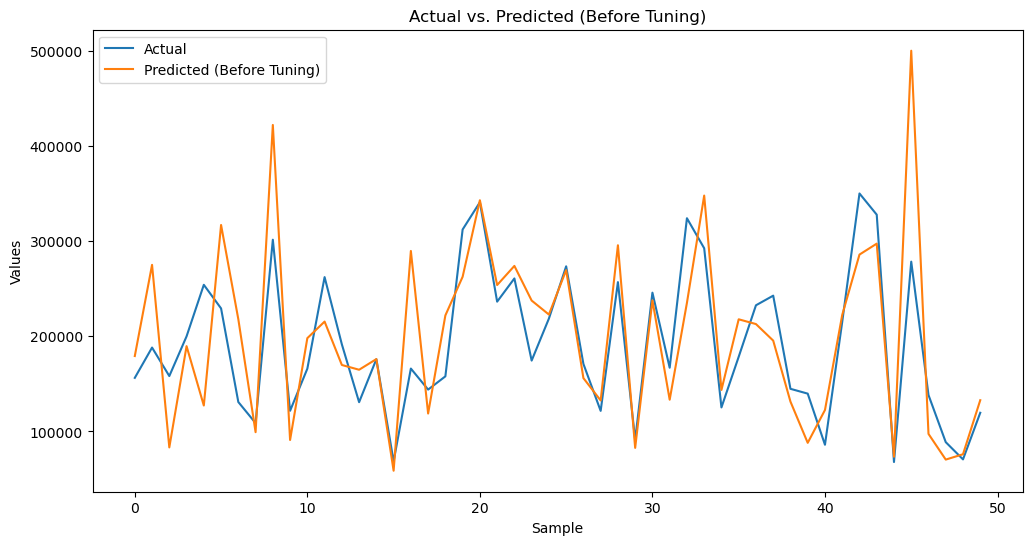

In [56]:
test_before_tuning = pd.DataFrame({'Predicted (Before Tuning)': y_pred, 'Actual': y_test})

test_before_tuning = test_before_tuning.reset_index()
test_before_tuning = test_before_tuning.drop(['index'], axis=1)

plt.figure(figsize=(12, 6))
plt.plot(test_before_tuning[:50])
plt.title('Actual vs. Predicted (Before Tuning)')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.legend(['Actual', 'Predicted (Before Tuning)'])
plt.show()


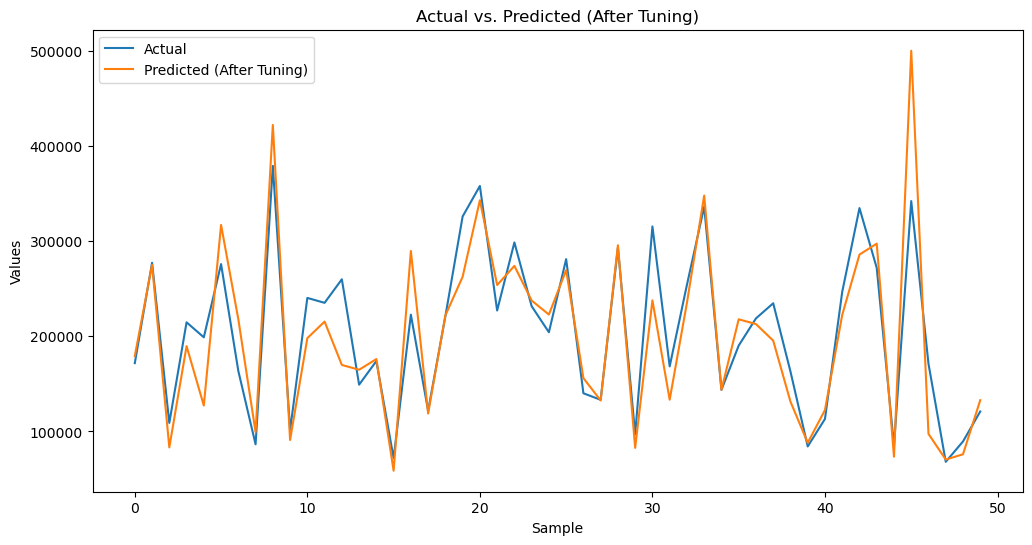

In [57]:
test_after_tuning = pd.DataFrame({'Predicted (After Tuning)': y_pred_xgb_tuning, 'Actual': y_test})

test_after_tuning = test_after_tuning.reset_index()
test_after_tuning = test_after_tuning.drop(['index'], axis=1)

plt.figure(figsize=(12, 6))
plt.plot(test_after_tuning[:50])
plt.title('Actual vs. Predicted (After Tuning)')
plt.xlabel('Sample')
plt.ylabel('Values')
plt.legend(['Actual', 'Predicted (After Tuning)'])
plt.show()

# Feature Importance.

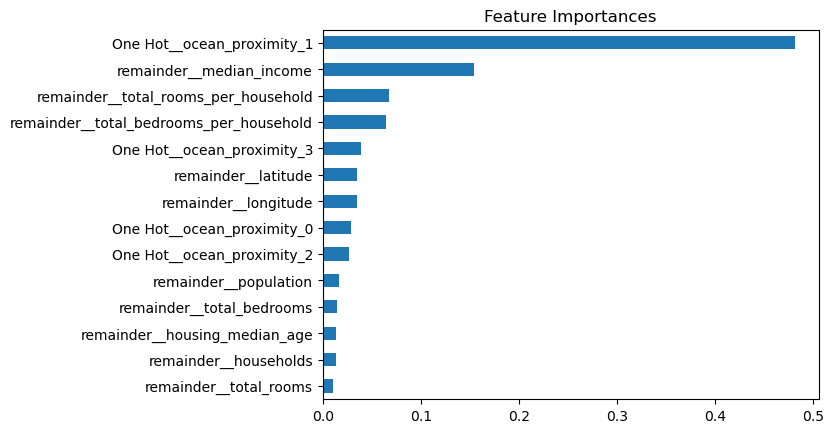

In [58]:
feature_imp = pd.Series(xgb_tuning['model'].feature_importances_, transformer.get_feature_names_out ()).sort_values(ascending = True)
feature_imp.plot(kind='barh', title='Feature Importances');

**Insight.**

The chart above is features that have the most influence on predicting house prices in California. The first place is occupied by the ocean proximity feature of the inland category then median income.

# Conclusion.

- from 6 models tested, then narrowed down to 3, finally determined the best model for predicting California house prices, namely XGBoost.
- The error rate on this model is 16% which is still in the good forecast category.
- out of 14 features, the feature that affects the price is the ocean proximity feature with the inland category.

# Recommendation.

- add more features that can support the accuracy of price predictions.
- update the data to be relevant to current conditions, because the data available is data in the 90s.

In [60]:
X_test

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,total_rooms_per_household,total_bedrooms_per_household
227,-118.10,34.06,36.0,1463.0,369.0,1492.0,366.0,3.2500,0,4.0,1.0
10657,-118.41,34.00,46.0,105.0,20.0,69.0,19.0,3.9643,0,6.0,1.0
6283,-115.60,32.87,3.0,1629.0,317.0,1005.0,312.0,4.1293,1,5.0,1.0
424,-117.66,33.51,18.0,2626.0,435.0,1302.0,522.0,4.0167,0,5.0,1.0
8112,-119.72,36.72,15.0,1713.0,246.0,766.0,232.0,6.8162,1,7.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
8341,-118.58,34.23,29.0,3907.0,773.0,2037.0,727.0,4.1023,0,5.0,1.0
7178,-116.99,34.30,29.0,5055.0,1036.0,410.0,191.0,3.5104,1,26.0,5.0
13171,-120.63,37.41,27.0,2083.0,444.0,1462.0,479.0,2.6439,1,4.0,1.0
12140,-118.14,33.86,36.0,1774.0,348.0,934.0,333.0,4.8571,0,5.0,1.0


# Save Model.

In [61]:
import pickle

# Saving the final model
filename = '../model/final_model.sav'
pickle.dump(xgb_tuning, open(filename, 'wb'))

In [63]:
# Loading the saved model
loaded_model = pickle.load(open('../model/final_model.sav', 'rb'))
loaded_model

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('One Hot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['ocean_proximity'])])),
                ('model',
                 XGBRegressor(base_score=None, booster=None, callbacks=None,
                              colsample_bylevel=None, colsample_bynode=None,
                              colsample_bytree=0.8, device=None,
                              early_stopping_rounds=None,
                              enable_categorica...
                              feature_types=None, gamma=5, grow_policy=None,
                              importance_type=None,
                              interaction_constraints=None, learning_rate=0.05,
                              max_bin=None, max_cat_threshold=None,
                              max_cat_to_onehot=None, max_delta_step=None,
                              max_depth=8, max_leaves=None,
                              min_child_weight=None, missing=nan,
                              monotone_constraints=None, multi_strategy=None,
                              n_estimators=119, n_jobs=None,
                              num_parallel_tree=None, random_state=1, ...))])

In [4]:
import requests

# Please run python model_api.py on your terminal first

# Set url of the model that has been deployed
url = "http://127.0.0.1:8000/prediction"

# Define the data to be predicted
payload = {
  "data": [
       {
          'longitude': -118.10,
          'latitude': 34.06,
          'housing_median_age': 36,
          'total_rooms': 1463,
          'total_bedrooms': 369,
          'population': 1492,
          'households': 366,
          'median_income': 3.2500,
          'ocean_proximity' : 'inland',
          'total_rooms_per_household' : 4.0,
          'total_bedrooms_per_household' : 1.0
        },
  ]
}

# Send a POST request to the URL
result = requests.post(url, json=payload)

# Show the response
print(result.json())

{'Response': [182291.9375]}
